#Step 3
Optimization with uncertain conversion rates

In [45]:
import copy

import numpy as np
import matplotlib.pyplot as plt


import Code.utils as utils
import Code.environment.settings as settings
from Code.environment.Environment import Environment
from Code.GreedyLearner import GreedyLearner
from Code.environment.Customer import Customer
from Code.UCBLearner import UCBLearner
from Code.TSLearner import TSLearner
from Code.NoisyClairvoyant import  NoisyClairvoyant

%matplotlib inline

In [46]:
cust_json = "customer_classes.json"
today_customer = 100
var_cust = 0
p_lambda = 1.0
graph_json = "business_full_graph.json"

arms = settings.prices
environment = Environment(cust_json,today_customer,var_cust,p_lambda, graph_json, arms)
clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm= environment.estimate_clairvoyant()
print("\n", clairvoyant_arms, clairvoyant_reward, exp_c, rew_per_arm.values())

loading: [==============================] 99.6%
 [3, 2, 3, 1, 0] 2977.6345603840005 29.776345603840003 dict_values([515.584622648, 353.22656385000005, 519.561558248, 416.77500682000004, 610.5615796920001, 432.07608545400007, 613.930663362, 497.171170042, 553.9373736320001, 391.49434891400006, 556.5895382479999, 450.69189531600006, 616.9431896560001, 456.25081854600006, 620.1695162020001, 515.4770642420001, 637.0113673280001, 470.080204971, 639.535595384, 537.0637448260001, 742.812302294, 558.0347373889999, 744.4030691329999, 626.8852717650001, 685.1168105760001, 516.976281283, 685.8878716800001, 579.8397626820001, 752.1054145960001, 586.336162791, 753.615725233, 648.9087200329999, 545.6220695760001, 381.58208131000004, 548.7664565220001, 443.732144186, 642.3804143420001, 462.0680602220001, 644.9519356390001, 526.068018185, 582.7741702400001, 419.142376986, 584.8085078500001, 477.46484127400004, 649.1756424320001, 487.0685072520001, 651.6636336990001, 545.0483858050001, 690.384629688000

In [47]:
print(sorted([(v, k) for k, v in rew_per_arm.items()])[-10:][::-1])

[(2977.6345603840005, (3, 2, 3, 1, 0)), (2933.3922122240006, (3, 2, 3, 3, 0)), (2893.5698004800006, (3, 2, 1, 1, 0)), (2866.897883776001, (3, 2, 3, 2, 0)), (2864.7386740040006, (3, 2, 3, 1, 2)), (2861.9406495680005, (3, 2, 1, 3, 0)), (2833.9894237320004, (3, 2, 3, 3, 2)), (2829.4787775360005, (3, 2, 3, 0, 0)), (2793.2880996160006, (3, 2, 1, 2, 0)), (2789.2464669260003, (3, 2, 1, 1, 2))]


In [48]:
n_arms = 4
n_products = 5 

TIME_HORIZON = 100
NUM_ITERATION = 1

In [49]:
customers = copy.deepcopy(environment.customers)
for customer in customers:
    customer.set_probability_buy(np.ones_like(customer.get_buy_distribution())/2)

In [50]:
clairvoyant_rewards_iterations = []
for i in range(NUM_ITERATION):
    clairvoyant_learner = NoisyClairvoyant(n_arms, n_products, customers, graph_json, arms, environment.customers_distribution, environment._get_aggregate_buy())
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        clairvoyant_super_arm = clairvoyant_learner.select_superarm()
        print(clairvoyant_super_arm)
        report = environment.round(clairvoyant_super_arm)
        clairvoyant_learner.update(clairvoyant_super_arm.copy(), report)
    clairvoyant_rewards = clairvoyant_learner.history_rewards
    clairvoyant_rewards_iterations.append(np.array(clairvoyant_rewards))
clairvoyant_rewards_iterations = np.array(clairvoyant_rewards_iterations)
clairvoyant_rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
loading: [===                           ] 10.0%[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
loading: [======                        ] 20.0%[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
loading: [=========                     ] 30.0%[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
loading: [============                  ] 40.0%[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]


(1, 100)

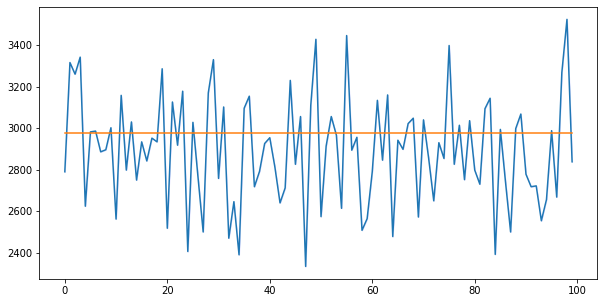

In [51]:
plt.figure(figsize=(10, 5))
mean = np.mean(clairvoyant_rewards_iterations, axis=0)
stdev = np.std(clairvoyant_rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(clairvoyant_rewards))], [clairvoyant_reward for _ in range(len(clairvoyant_rewards))])
plt.show()

UCB

In [52]:
ucb_rewards_iterations = []
for i in range(NUM_ITERATION):
    ucb1_learner = UCBLearner(n_arms, n_products, customers, graph_json, arms, environment.customers_distribution)
    print('Iteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        ucb_super_arm = ucb1_learner.select_superarm()
        print(ucb_super_arm)
        report = environment.round(ucb_super_arm)
        ucb1_learner.update(ucb_super_arm.copy(), report)
    ucb_rewards = ucb1_learner.history_rewards
    ucb_rewards_iterations.append(np.array(ucb_rewards))
ucb_rewards_iterations = np.array(ucb_rewards_iterations)
ucb_rewards_iterations.shape

Iteration # 1
loading: [                              ] 0.0%[3, 3, 3, 3, 3]
[3, 2, 3, 3, 3]
[3, 2, 3, 2, 2]
[3, 2, 3, 2, 2]
[3, 2, 3, 3, 2]
[3, 2, 3, 2, 2]
[3, 2, 3, 3, 2]
[3, 2, 3, 3, 1]
[3, 2, 3, 2, 2]
[3, 2, 2, 1, 1]
loading: [===                           ] 10.0%[3, 3, 3, 1, 3]
[3, 2, 2, 1, 2]
[3, 2, 3, 1, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 1, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 2, 2]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
loading: [======                        ] 20.0%[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 1, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 0, 0]
[3, 2, 3, 0, 0]
loading: [=========                     ] 30.0%[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 2, 2]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 3, 0]
[3, 2, 3, 1, 0]
[3, 2, 3, 1, 2]
[3, 2, 3, 3, 0]
loading: [============                  ] 40.0%[3, 2, 3, 3, 0]
[3, 2, 3, 3, 3]
[3, 2, 3, 3, 2]
[3, 2, 3, 1, 0]
[3, 2, 3, 2, 2]
[3, 2, 3, 3, 0]
[3, 2, 3, 1, 0]


(1, 100)

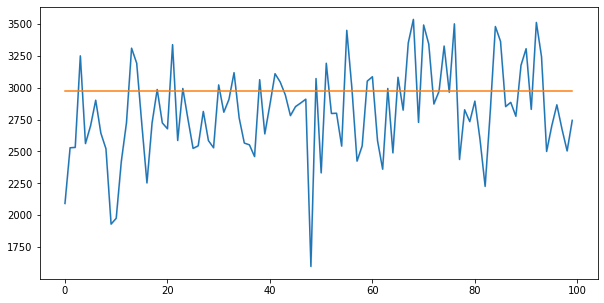

In [53]:
plt.figure(figsize=(10, 5))
mean = np.mean(ucb_rewards_iterations, axis=0)
stdev = np.std(ucb_rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(ucb_rewards))], [clairvoyant_reward for _ in range(len(ucb_rewards))])
plt.show()

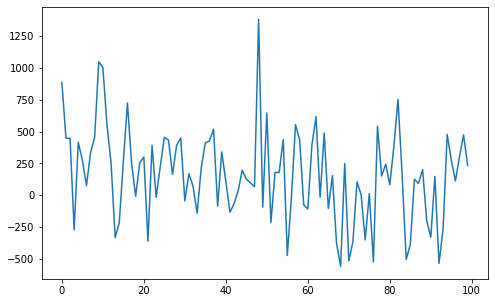

In [54]:
plt.figure(figsize=(8,5))
ucb_regret = clairvoyant_reward - ucb_rewards_iterations 
ucb_mean_regret = np.mean(ucb_regret, axis=0)

plt.plot(range(len(ucb_mean_regret)), ucb_mean_regret)
plt.show()

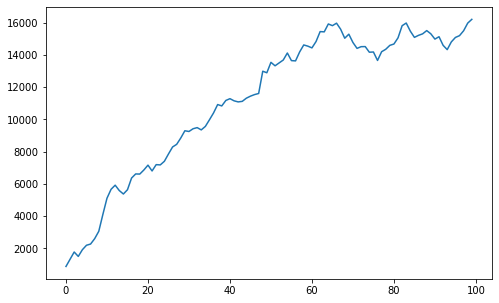

In [55]:
plt.figure(figsize=(8,5))
ucb_regret = clairvoyant_reward - ucb_rewards_iterations 
ucb_cumulative_regret = np.cumsum(ucb_regret, axis=1)
ucb_cum_reg_mean = np.mean(ucb_cumulative_regret, axis=0)

plt.plot(range(len(ucb_cum_reg_mean)), ucb_cum_reg_mean)
plt.show()

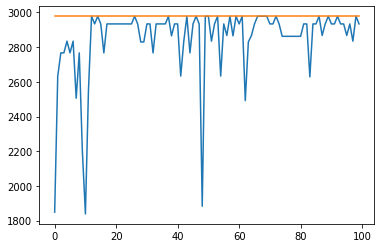

In [56]:
ucb_pulled_arms = ucb1_learner.get_all_pulled()
theoretical_rewards = [rew_per_arm[tuple(i)] for i in ucb_pulled_arms]

plt.plot([i for i in range(len(ucb_pulled_arms))], theoretical_rewards)
plt.plot([_ for _ in range(len(ucb_rewards))], [clairvoyant_reward for _ in range(len(ucb_rewards)) ])
plt.show()


TS

In [57]:
ts_rewards_iterations = []
for i in range(NUM_ITERATION):
    ts_learner = TSLearner(n_arms, n_products, customers, graph_json, arms, environment.customers_distribution)
    print('\nIteration #', i+1)
    for t in range(TIME_HORIZON):
        if t % 10 == 0:
            utils.progress_bar(t, TIME_HORIZON)
        ts_super_arm = ts_learner.select_superarm()
        print(ts_super_arm)
        report = environment.round(ts_super_arm)
        ts_learner.update(ts_super_arm.copy(), report)
    ts_rewards = ts_learner.history_rewards
    ts_rewards_iterations.append(np.array(ts_rewards))
ts_rewards_iterations = np.array(ts_rewards_iterations)
ts_rewards_iterations.shape


Iteration # 1
loading: [                              ] 0.0%[3, 3, 3, 3, 1]
[3, 1, 0, 0, 0]
[2, 2, 1, 1, 3]
[3, 2, 2, 3, 2]
[3, 2, 1, 3, 0]
[3, 2, 1, 3, 0]
[3, 2, 1, 3, 2]
[3, 2, 1, 2, 2]
[3, 2, 1, 3, 2]
[3, 2, 1, 3, 0]
loading: [===                           ] 10.0%[3, 2, 1, 3, 0]
[3, 2, 1, 3, 0]
[3, 2, 1, 3, 2]
[3, 2, 1, 3, 0]
[3, 2, 1, 2, 0]
[3, 2, 1, 3, 0]
[3, 2, 1, 3, 0]
[3, 2, 1, 3, 2]
[3, 2, 1, 3, 0]
[3, 2, 1, 3, 0]
loading: [======                        ] 20.0%[3, 2, 1, 3, 0]
[3, 2, 1, 3, 0]
[3, 2, 1, 2, 0]
[3, 2, 1, 3, 0]
[3, 2, 1, 3, 2]
[3, 2, 1, 2, 0]
[3, 2, 1, 3, 0]
[3, 2, 1, 3, 0]
[3, 2, 1, 3, 0]
[3, 2, 1, 3, 0]
loading: [=========                     ] 30.0%[3, 2, 1, 3, 0]
[3, 2, 1, 3, 0]
[3, 2, 1, 3, 0]
[3, 2, 1, 2, 0]
[3, 2, 1, 3, 0]
[3, 2, 1, 3, 0]
[3, 2, 1, 3, 0]
[3, 2, 1, 3, 0]
[3, 2, 1, 3, 0]
[3, 2, 1, 3, 0]
loading: [============                  ] 40.0%[3, 2, 1, 3, 0]
[3, 2, 1, 3, 0]
[3, 2, 1, 3, 0]
[3, 2, 1, 3, 0]
[3, 2, 1, 3, 0]
[3, 2, 1, 3, 0]
[3, 2, 1, 3, 0]

(1, 100)

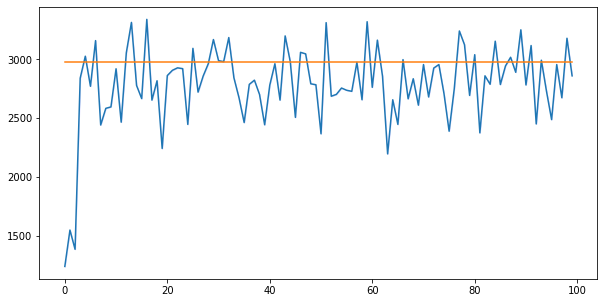

In [58]:
plt.figure(figsize=(10, 5))
mean = np.mean(ts_rewards_iterations, axis=0)
stdev = np.std(ts_rewards_iterations, axis=0)

plt.plot(range(len(mean)), mean)
plt.fill_between(range(len(mean)), (mean-stdev), (mean+stdev), color='b', alpha=.1)

plt.plot([_ for _ in range(len(ts_rewards))], [clairvoyant_reward for _ in range(len(ts_rewards))])
plt.show()

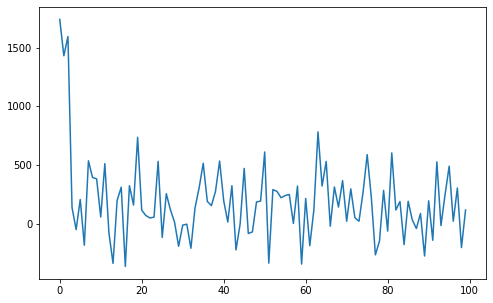

In [59]:
plt.figure(figsize=(8,5))
ts_regret = clairvoyant_reward - ts_rewards_iterations 
ts_mean_regret = np.mean(ts_regret, axis=0)

plt.plot(range(len(ts_mean_regret)), ts_mean_regret)
plt.show()

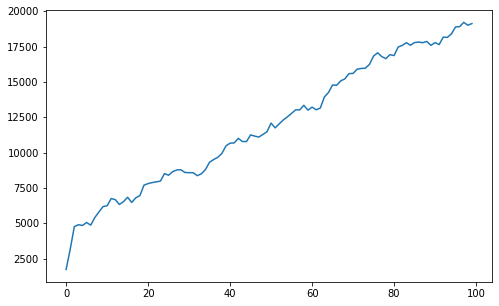

In [60]:
plt.figure(figsize=(8,5))
ts_regret = clairvoyant_reward - ts_rewards_iterations 
ts_cumulative_regret = np.cumsum(ts_regret, axis=1)
ts_cum_reg_mean = np.mean(ts_cumulative_regret, axis=0)

plt.plot(range(len(ts_cum_reg_mean)), ts_cum_reg_mean)
plt.show()

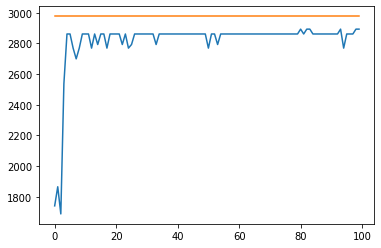

In [61]:
ts_pulled_arms = ts_learner.get_all_pulled()
theoretical_rewards = [rew_per_arm[tuple(i)] for i in ts_pulled_arms]

plt.plot([i for i in range(len(ts_pulled_arms))], theoretical_rewards)
plt.plot([_ for _ in range(len(ts_rewards))], [clairvoyant_reward for _ in range(len(ts_rewards)) ])
plt.show()


In [62]:
th_rews = list(rew_per_arm.values())
th_rews.sort()
delta_arms = th_rews[-1] - th_rews[-2]
print(delta_arms)
print(ts_learner.t)
seen = sum(sum(sum(ts_learner.beta_parameters)))
print(np.log(seen))
theoretical_regret = 1024 * np.log(seen)/delta_arms
theoretical_regret

44.24234815999989
100
9.698245312357605


224.46826655627066